<div class="alert alert-block alert-warning">
    
Оглавление:
    
1. [Предобработка данных](#step1)
2. [Исследовательский анализ данных EDA](#step2)
3. [Построение модели прогнозирования оттока клиентов](#step3)
4. [Кластеризация клиентов](#step4)
5. [Общий вывод по проекту и рекомендации](#step5)
    
</div> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

## Предобработка данных <a id='step1'></a>

In [2]:
#Локалка
#df = pd.read_csv('C://Users/Ритер/Desktop/Практикум/datasets/gym_churn.csv')
#Практикум
df = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
def vision_df(list_df):
    for i in list_df:
        print('----------------------------DataFrame---------------------------------')
        print()
        print('Info', i.info())
        print()
        print()
        for col in i.columns:
            print(f'Duplicate in {col}: {i[col].duplicated().sum()}')
        print()
        display(i.head())
        print('------------------------------------------------------------------------')
        print('------------------------------------------------------------------------')

In [4]:
vision_df([df])

----------------------------DataFrame---------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


------------------------------------------------------------------------
------------------------------------------------------------------------


In [5]:
df['Month_to_end_contract'] = df['Month_to_end_contract'].astype('int64')

In [6]:
df.columns = df.columns.str.lower()

Пропусков не найдено, нужно перевести колонку с месяцами до окончания действия абонемента из вещественного типа данных в целочисленный. Так как нет идентификатора отдельного пользователя, то нельзя сказать точно есть ли дубли или это просто клиенты похожи. Название колонки с полом единственное, которое написано со строчной буквы, мне удобнее, когда все написано со строчной, поэтому привела к единому шаблону все названия.

## Исследовательский анализ данных EDA <a id='step2'></a>

In [7]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


**Портрет клиента:**

Наш клиент это женщина или мужчина с равной долей вероятности, который живет или работает рядом с фитнес-клубом. Нашему клиенту близко от 27 до 31 года, он взял себе абонемент на 1 месяц, он пользуется дополнительными фитнес-услугами, но не часто. Ходит заниматься 1-2 раза в неделю, групповые занятие не посещал. Пришел в клуб самостоятельно не по партнерской программе или акции"приведи друга". 

In [8]:
df.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [9]:
#пропишу словарь-расшифровку названий для удобства считывания графиков
dict_columnnames = {'gender':'Пол',
                    'near_location':'Близость к клубу',
                    'partner':'Клиент пришел по партнерской программе',
                    'promo_friends':'Клиент пришел по акции "приведи друга"',
                    'phone':'Наличие номера телефона',
                    'contract_period':'Длительность абонемента в месяцах',
                    'group_visits':'Посещение групповых занятий',
                    'age':'Возраст',
                    'month_to_end_contract':'Количество месяцев до конца абонемента',
                    'lifetime':'Месяцы посещения с самого налача',
                    'avg_class_frequency_total':'Средняя частота посещения в неделю за все время',
                    'avg_class_frequency_current_month':'Средняя частота посещения в неделю за последний месяц',
                    'churn':'Отток',
                    'avg_additional_charges_total':'Суммарная выручка фитнес-услуг'
                   }

In [10]:
#чтобы руками не прописывать какие признаки бинарные, а какие нет
binar_cols = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'churn', 'group_visits']

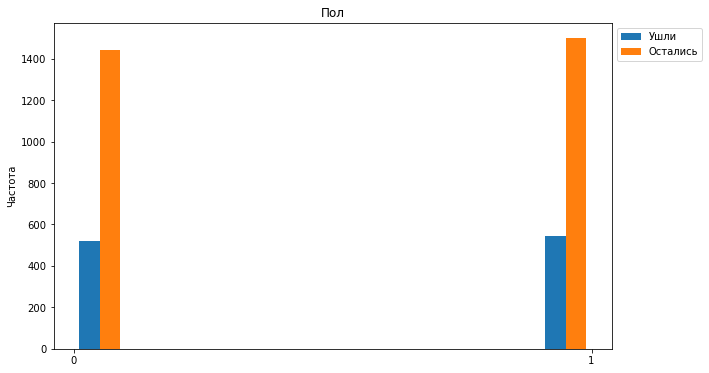

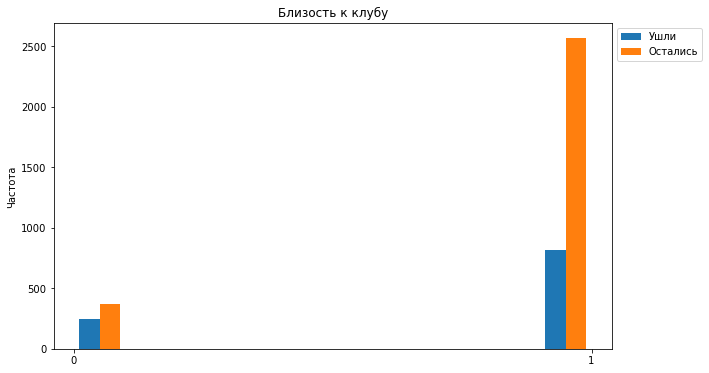

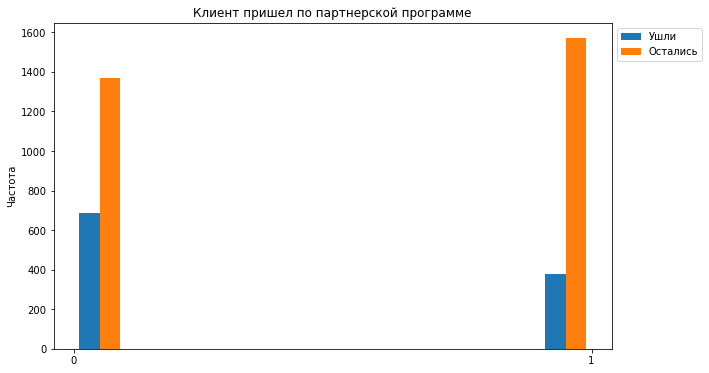

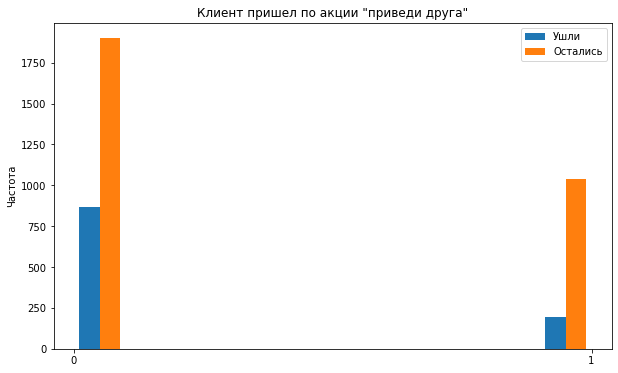

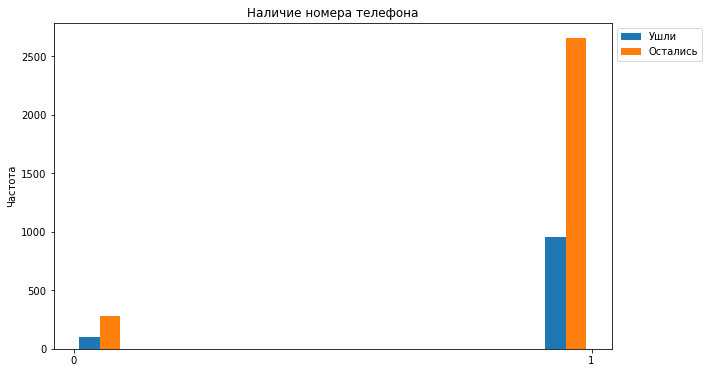

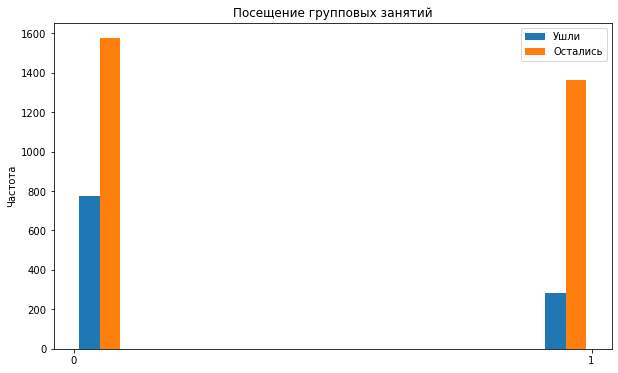

In [11]:
for i in df[binar_cols].drop(columns=['churn']).columns:  
    fig, ax = plt.subplots(figsize=(10, 6))

    x = df[df['churn'] == 1][i]
    y = df[df['churn'] == 0][i]

    plt.hist([x, y], label=['Ушли', 'Остались'])
    ax.set_title(dict_columnnames.get(i))
    ax.set_ylabel("Частота")
    plt.legend(bbox_to_anchor=(1, 1))
    ax.set_xticks(np.arange(df[i].min(), df[i].max()+1))

    plt.show()

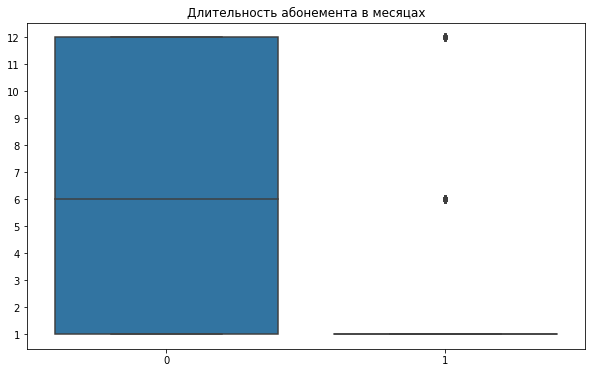

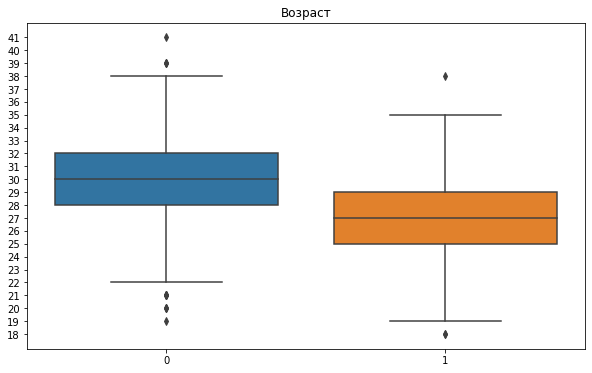

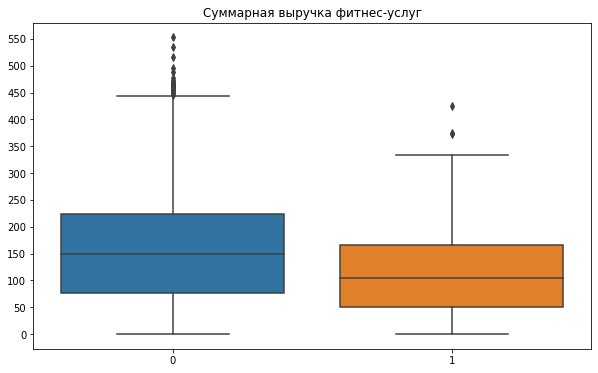

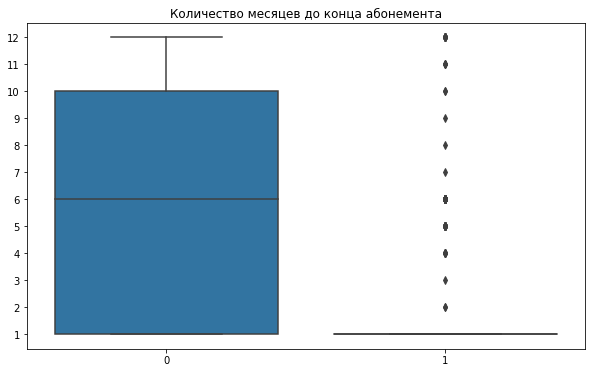

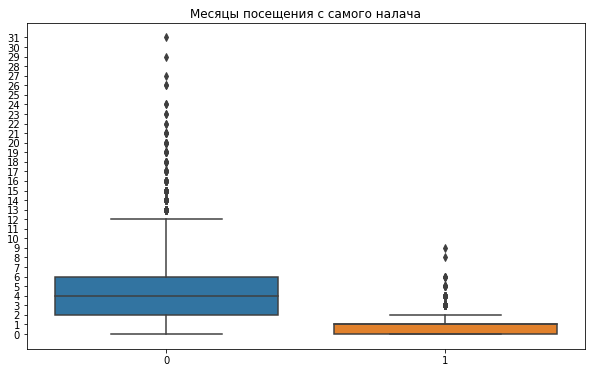

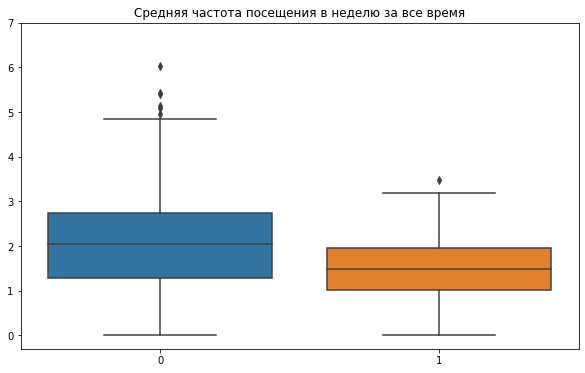

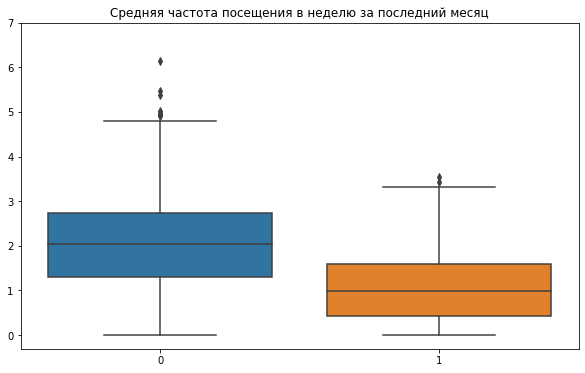

In [12]:
for i in df.drop(columns=binar_cols + ['churn']).columns:  
    fig, ax = plt.subplots(figsize=(10, 6))

    ax = sns.boxplot(y=df[i], data=df, x='churn')
    ax.set_title(dict_columnnames.get(i))
    ax.set_ylabel("")
    ax.set_xlabel("")
    if i == 'avg_additional_charges_total':
        ax.set_yticks(np.arange(0, df[i].max()+1, step=50))
    else:
        ax.set_yticks(np.arange(df[i].min(), df[i].max()+1))

    plt.show()

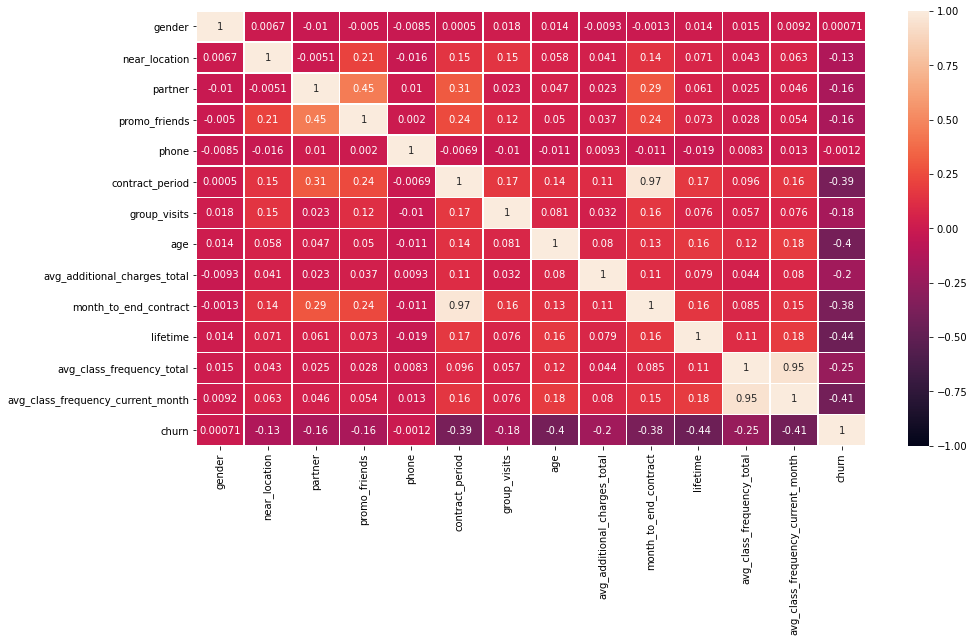

In [13]:
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.heatmap(df.corr(), annot=True, linewidths=.5, vmax=1, vmin=-1)

Судя по гистограммам можно сделать следующие предположения:
Среди тех, кто ходят в отток чаще:
1. абонемент был оформлен на 1 месяц
2. им скорее всего 25-26 лет
3. скорее всего групповое занятие они не посещали
4. они посетили фитнес-клуб 1 месяц
5. средняя частота посещений в неделю не больше 1 раза за последний месяц, а за все время 1,5 раза

Среди тех, кто НЕ ушел в отток чаще:
1. клуб расположен близко от дома или работы
2. пришли самостоятельно в зал(не по акции "приведи друга" или по партнерской программе)
3. им скорее всего от 30 лет
4. средняя частота посещений в неделю около 2 раз за последний месяц, а за все время 2 раза


т.е. мы видим, что люди, которые чаще ходят на тренировки в неделю в среднем, они в отток не уходят им нравится ходить в зал и заниматься. В среднем они занимаются больше 4 месяцев. Те же кто больше не пришел в зал, скорее всего брали себе "пробный" период на месяц и после него больше не ходили.

На тепловой карте же мы видим, что корреляция есть между количеством месяцев до окончания действия абонемента и длительностью действующего абонемента, а также средней частотой посещений в неделю за предыдущий месяц и средней частотой за все время с начала действия абонемента. Что вполне оправдано, ведь эти метрики похожи друг на друга. С целевой переменной ***churn*** ничего сильно не коррелирует. Небольшая отрицательная корреляция есть с признаком ***lifetime***.

Выходит, что предсказать отток клиентов можно по нескольким метрикам таким как:
* возраст
* длительность абонемента
* партнерская и программа "приведи друга"
* близкое расположение работы или дома к клубу
* среднее посещение зала в неделю за все время 
* посещение групповых занятий

Признаки, которые друг с другом сильно коррелируют я не беру.

## Построение модели прогнозирования оттока клиентов <a id='step3'></a>

In [14]:
X = df[['age', 'near_location', 'avg_class_frequency_total','contract_period', 'group_visits', 'partner', 'promo_friends', 'avg_class_frequency_current_month']]
y = df['churn']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=df['churn'])

In [16]:
models = [RandomForestClassifier(n_estimators = 100, random_state=0), LogisticRegression(max_iter=1000)]

In [17]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.fit_transform(X_test)

In [18]:
def prediction(m, X_train, X_test, y_train, y_test):
    model = m
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predict)))
    print('Precision: {:.2f}'.format(precision_score(y_test, y_predict)))
    print('Recall: {:.2f}'.format(recall_score(y_test, y_predict)))

In [19]:
for i in models:
    print('---------------------------------------')
    print(i)
    prediction(i, X_train_st, X_test_st, y_train, y_test)

---------------------------------------
RandomForestClassifier(random_state=0)
Accuracy: 0.89
Precision: 0.88
Recall: 0.68
---------------------------------------
LogisticRegression(max_iter=1000)
Accuracy: 0.90
Precision: 0.88
Recall: 0.73


По всем метрикам модель логистической регрессии показала себя лучше либо равна, чем модель случайного дерева. Думаю, это связано с тем, что как раз в регрессии идет подбор веса нежели, чем сценарный подход у "дерева". 

## Кластеризация клиентов <a id='step4'></a>

In [20]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

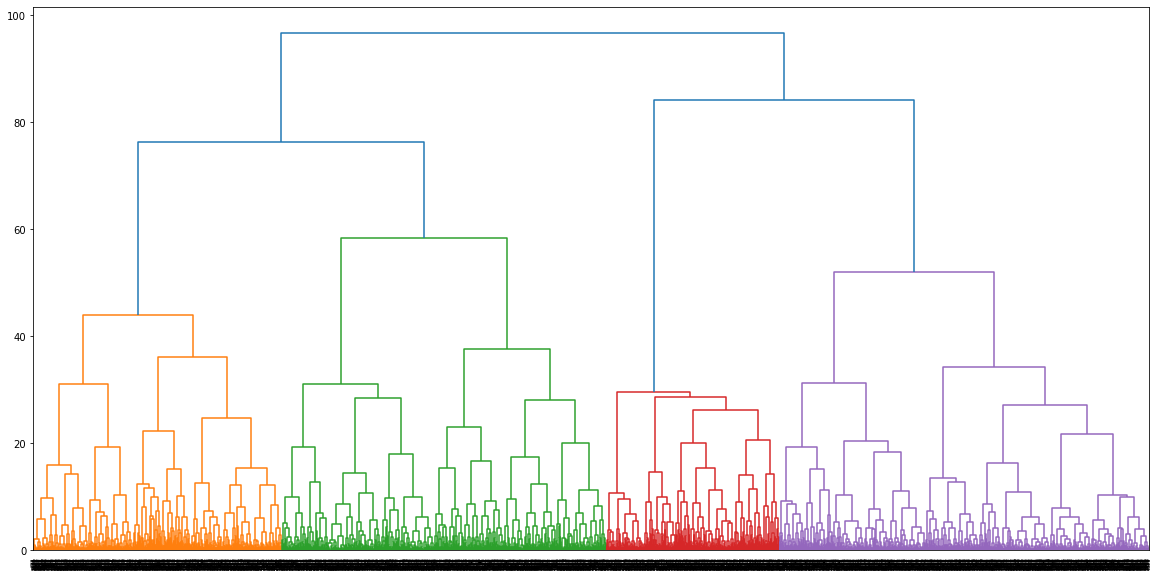

In [21]:
linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(20, 10))  
dendrogram(linked, orientation='top')
plt.show()

На дендрограмме алгоритм отрисовал 4 кластера, они не одинаковы по количеству. С помощью алгоритма K-Mean разделю клиентов на 5 кластеров, чтобы результаты можно было бы сравнить с другими учениками курса.

In [22]:
km = KMeans(n_clusters = 5, random_state=10) 
labels = km.fit_predict(X_sc)

In [23]:
df['claster'] = labels

In [24]:
df.groupby('claster').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
claster,,,,,,,,,,,,,,
0,0.501199,1.000000,0.980815,0.516787,0.895683,5.363309,0.380096,28.726619,145.427763,4.958034,3.557554,1.142373,0.998424,0.293765
1,0.543529,0.983529,0.170588,0.056471,0.898824,4.070588,0.481176,30.068235,156.266965,3.760000,4.488235,2.810628,2.804703,0.088235
2,0.500000,1.000000,0.000000,0.106275,0.903846,2.578947,0.363360,28.417004,137.505659,2.468623,2.979757,1.254874,1.035324,0.478745
3,0.504087,0.985014,0.945504,0.828338,0.910082,8.876022,0.584469,30.153951,157.767164,8.032698,4.603542,2.615747,2.612889,0.031335
4,0.500000,0.000000,0.488215,0.070707,0.912458,2.910774,0.227273,28.639731,138.054794,2.735690,3.020202,1.707966,1.533272,0.412458


Сразу видно, что у 4 кластера в отличие от остальных среднее значение близости к клубу равно 0, т.е. это единственный кластер, в котором клиенты живут или работают далеко от клуба, хотя это одно из преимуществ для клиента. Интересный момент, что алгоритм распределил клиентов так между кластерами, что средний возраст у каждого кластера 28-30 лет. 1 и 3 кластеры выделились средним значением посещений в неделю за последний месяц. У 3 кластера больше всех в среднем месяцев до конца действия абонемента — 8 месяцев. 

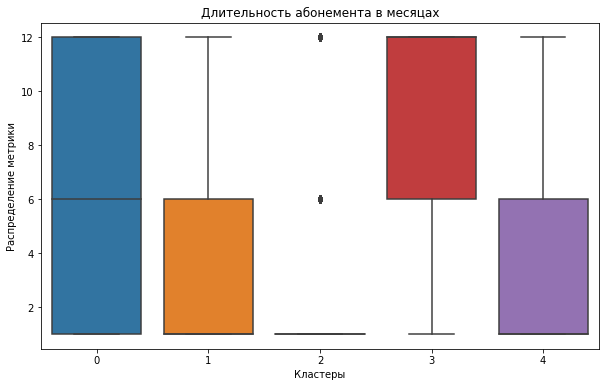

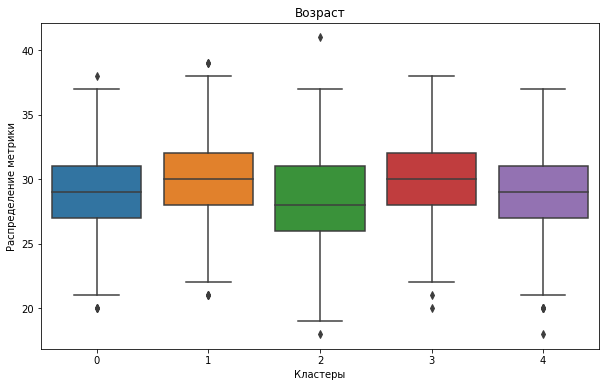

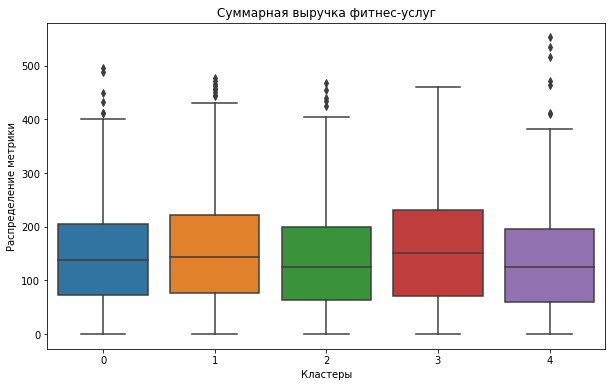

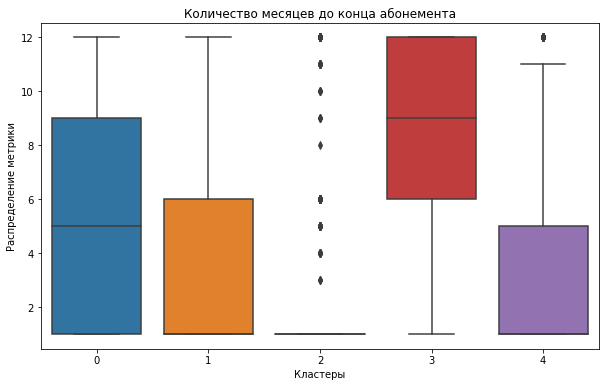

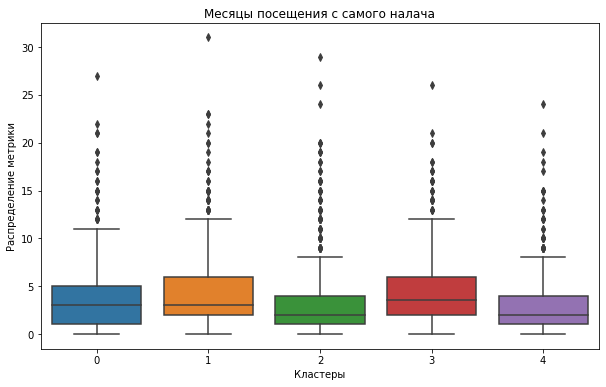

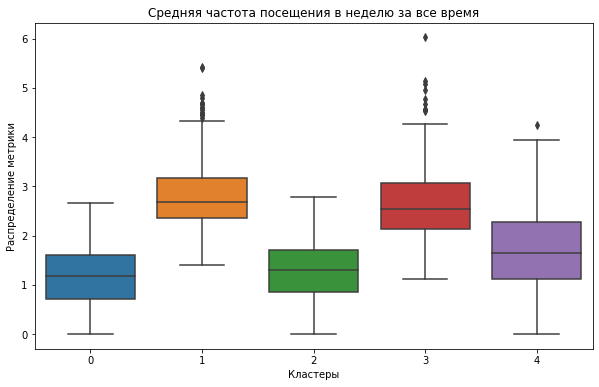

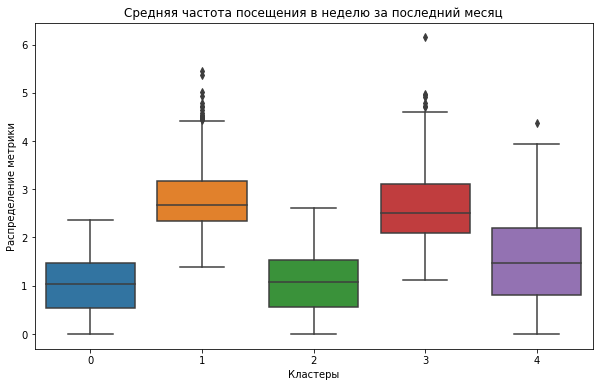

In [25]:
for i in df.drop(columns=binar_cols + ['claster']).columns:  
    fig, ax = plt.subplots(figsize=(10, 6))

    ax = sns.boxplot(y=df[i], data=df, x='claster')
    ax.set_title(dict_columnnames.get(i))
    ax.set_ylabel("Распределение метрики")
    ax.set_xlabel("Кластеры")

    plt.show()

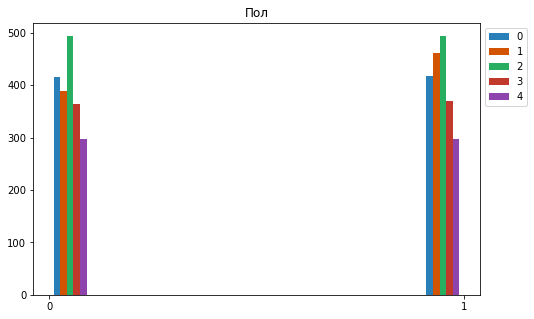

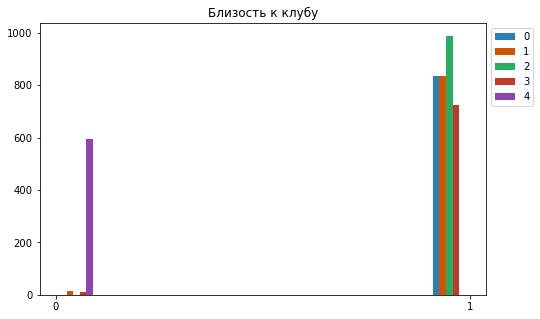

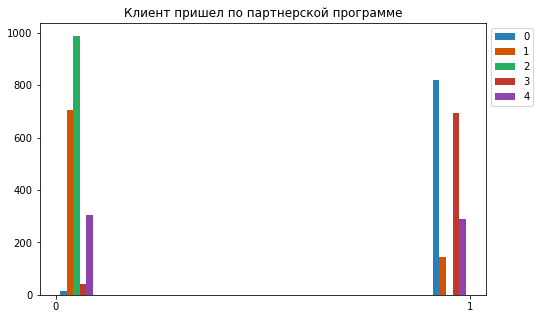

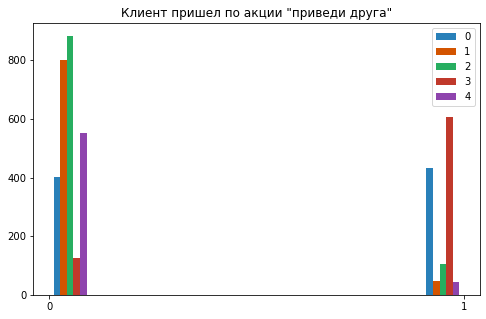

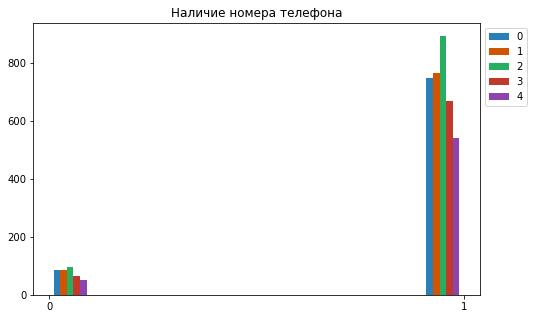

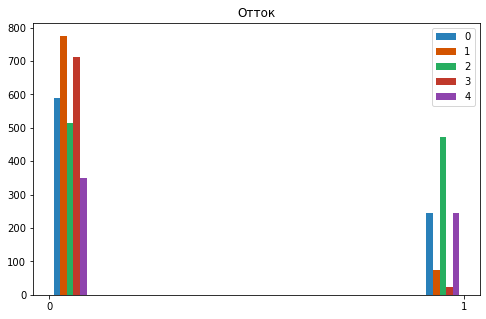

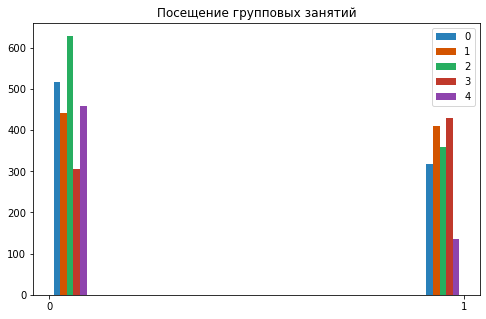

In [26]:
for i in df[binar_cols].columns:  
    fig, ax = plt.subplots(figsize=(8, 5))
    
    a = df[df['claster'] == 0][i]
    b = df[df['claster'] == 1][i]
    c = df[df['claster'] == 2][i]
    d = df[df['claster'] == 3][i]
    e = df[df['claster'] == 4][i]


    ax.hist([a, b, c, d, e], label=[0, 1, 2, 3, 4], color=['#2980b9', '#d35400', '#27ae60', '#c0392b', '#8e44ad'])
    ax.set_title(dict_columnnames.get(i))
    plt.legend(bbox_to_anchor=(1, 1))
    ax.set_xticks(np.arange(df[i].min(), df[i].max()+1))

    plt.show()

По длительности абонементов алгоритм распределил по кластерам клиентов так, что распределения получились разными(кроме 1 и 4 кластера). Тоже самое произошло с количеством до конца действия абонемента. В кластерах 0 и 3(синий и зеленый) по средней частоте посещения зала за неделю предобладают люди, которые меньше занимаются. 

В целом, какие-то признаки "размазали" равномерно распределили между кластерами, а где-то сделали перекос, как с месяцами до конца действия абонемента.

In [27]:
churn_ratio = df.groupby('claster').agg({'churn':['count', 'sum']}).reset_index()
churn_ratio.columns = ['claster', 'cnt_all', 'cnt_churn']
churn_ratio['ratio_churn'] = round(churn_ratio['cnt_churn'] / churn_ratio['cnt_all'] * 100, 1)
churn_ratio.sort_values('ratio_churn', ascending=False)

,claster,cnt_all,cnt_churn,ratio_churn
2,2,988,473,47.9
4,4,594,245,41.2
0,0,834,245,29.4
1,1,850,75,8.8
3,3,734,23,3.1


Судя по таблице оттока можно сделать вывод, что есть кластеры более надежные, т.е. доля оттока в них меньше, чем в других. Если делать рейтинг от самого надежного кластера, то получается такая картина(в скобках указан цвет кластера на графиках выше):
1. Кластер 3(красный)
2. Кластер 1(оранжевый)
3. Кластер 0(синий)
4. Кластер 4(фиолетовый)
5. Кластер 2(зеленый)

Несмотря на то, что у 2 кластера(красный) больше всего по количеству клиентов, но почти половина из них уходит в отток, в то время как у 3 кластера(зеленый) уходят только 3% в отток.

## Общий вывод по проекту и рекомендации <a id='step5'></a>

Как стало понятно из исследования какого-то одного признака сильно влияющего на то, будет ли клиент продолжать ходить в спортзал, нет. Это совокупность признаков, где у каждого из признаков одинаковое или почти одинаковое влияние на исход. Есть также признаки, которые перекликаются друг с другом, что может помешать алгоритму с обучением. Поэтому можно было бы не собирать данные и не тратить на их хранение и сбор ресурсы. Я говорю про пары признаков такие как:
* Количество месяцев до конца действия абонемента - Длительность абонемента в месяцах
* Средняя частота посещения в неделю за последний месяц - Средняя частота посещения в неделю за все время

Алгоритм кластеризации выделил следующие типы клиентов

**Основные портреты клиентов(номера соответствуют номерам кластеров):**
0. клиенты, у которых работа рядом с клубом, потому что они пришли по партнерской программе, в среднем им 28 лет, ходят уж 3 месяца, занимаются около 1 раза в неделю. Они хороший среднячок, примерно 30% из них уйдут в отток. Берут чаще полугодичный абонемент.
1. клиенты, которые в основном находятся рядом со спортзалом, они пришли в него самостоятельно по большей части. Ходят они 2-3 раза в неделю. Это одиночки, которые решили ходять в зал самостоятельно. Может быть из-за самостоятельности и активности на неделе в этой группе уходят в отток мене 10% всех клиентов.
2. клиенты, рядом со спортзалом, они не участвовали ни в какой акции или программе. В среднем они тратят меньше всех других групп на фитнес-услуги. Ходят 1 раз в неделю. Берут 3 месяца на занятия по абонементу. Именно из этого кластера уходят в отток больше всего, около 47%.
3. клиенты, которые опять же в основном находятся рядом со спортзалом. В этой группе больше всего клиентов, которые пришли по партнерской программе и по акции "приведи друга", они также активнее всех участвуют в групповых занятиях. Берут себе в основном годичный абонемент и их "жизненный путь" в фитнесе дольше всех. Тратят на фитнес-услугах больше всех. И уходят в отток чуть больше 3% из этой группы.
4. клиенты, которые живут и работают далеко от фитнес-клуба. Они вторые по оттоку. Понятно, что долгая дорога, отсутствие знакомых или друзей(почти не участвовали в партнерской программе или а акции "приведи друга", также меньше всех остальных типов  посещали групповые занятия), не настраивают на долгое и плодотворное занятие фитнесом. В среднем берут 3-х месячный абонемент. Но ходят больше, чем группа 2, которая живет ближе.

### Рекомендации

* Поддержка других людей незнакомых или друзей очень помогает заниматься постоянно. Мы видим это на кластере 3. Поэтому можно устраивать какие-то занятия для пар, чтобы привлекать партнеров, расширять партнерские программы или же акции по приводу друзей. 
* Для тех кто дальше живет можно было бы сделать более удобные групповые занятия по времени. Таким образом получались бы группы людей, которые смогли бы поддерживать друг друга в посещении клуба.
* Помимо условий для "коллективистов" — людей, которым нравится ходить вместе с кем-то, нужно создать условия для одиночных и самостоятельных посетителей. Возможно, бесплатная услуга раз в 3 месяца "тренировка с тренером", которая будет направлена на то, чтобы профессионал оценил старания клиента и направил его к нужной цели подсказкой.